In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


def xor_data():
    
    X=np.zeros((200,2))
    Y=np.zeros(200)
    X[0:50,:]=np.random.random((50,2))/2.0
    X[50:100,:]=np.random.random((50,2))/2.0+0.5
    X[100:150,:]=np.random.random((50,2))/2.0+np.array([0.5,0])
    X[150:200,:]=np.random.random((50,2))/2.0+np.array([0.,0.5])   
    Y[0:200]=np.array(100*[0]+100*[1])
    return X,Y

In [48]:
def donut_data():
    
    N=1000
    D=2

    R_inner=5.0
    R_outer=10.0

    R1=np.random.randn(int(N/2))+R_inner          #spread aroung 5
    theta=2*np.pi*np.random.random(int(N/2))
    #X_inner=np.concatenate([R1*np.cos(theta),R1*np.sin(theta)]).reshape(500,2) #same as below
    X_inner=np.concatenate([[R1*np.cos(theta)],[R1*np.sin(theta)]]).T

    R2=np.random.randn(int(N/2))+R_outer
    theta=2*np.pi*np.random.random(int(N/2))
    X_outer=np.concatenate([[R2*np.cos(theta)],[R2*np.sin(theta)]]).T

    X=np.concatenate([X_inner,X_outer])
    T=np.array([0]*int(N/2)+[1]*int(N/2))
    return X,T
#    plt.scatter(X_inner[:,0],X_inner[:,1])
#    plt.scatter(X_outer[:,0],X_outer[:,1])

In [49]:
X,Y=donut_data()

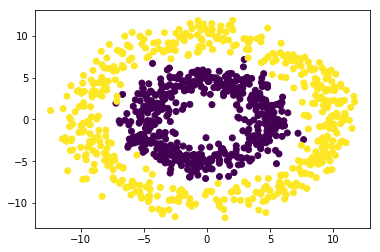

In [50]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [44]:
X,Y=xor_data()

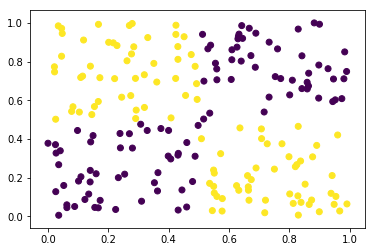

In [45]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [37]:
X[0]

array([0.0919723 , 0.48543015])

In [56]:
def fig_data(limit=None,ratio=0.5):
    
    
    count=0

    label_map=['0','1','2','3','4','5','6','7','8','9']
    img_matrix=[]
    expr=[]
    img_norm_global=[]
    img_vec_=[]

    for line in open('train.csv'):     #file consist of 35887 entry, but 35875 not zero max of pixel non zero each entry has 1 digit for emotion then and array of 2304 pixel intensity (48*48) and 1 text for name (traning/test) not necessary here
        count=count+1
        #print(count)


        list_=line.replace('\n',' ').replace(',',' ').strip().split(' ')
        #print(list_)
        if (count<5):

            #print(len(list_))
            #print(list_)
            pass
        #txt=list_[len(list_)-1]
        if(count>1):
            image_vec=np.array((list_[1:len(list_)]))   #list string
            image_vec_i=[int(i) for i in image_vec]   # list to integer

            if(len(list_)==785 and np.max(image_vec_i)!=0 and count>1):     #28*28+1

                expr_=int(list_[0])
                expr.append(expr_)

                image_vec_i=np.array(image_vec_i)
                img_vec_.append(image_vec_i)
                image_vec_i_norm=np.array(image_vec_i)/255.0                              #np.max(image_vec_i)
                img_matrix.append(image_vec_i_norm)             #for solving
                len_N=int(np.sqrt(np.shape(image_vec_i)[0]))
                img=image_vec_i.reshape(len_N,len_N)
                img_norm=img/255.0                              #(np.max(img))
                #print(np.max(img))
                img_norm_global.append(img_norm)     #for plotting figs



    N=np.shape(img_matrix)[0]
    D=np.shape(img_matrix)[1]

    YY=np.random.randn(N)
    XX=np.zeros((N,D))


    for i in range(N):
        YY[i]=expr[i]    #expressions
        for j in range(D):

            XX[i,j]=img_matrix[i][j]     #pixels into XX
    
    return shuffle_divide(XX,YY,ratio,limit)
    

def shuffle_divide(X,Y,ratio,limit):
    
    X,Y=shuffle(X,Y)
    N=np.shape(X)[0]
    D=np.shape(X)[1]
    
    if limit is not None:
        X=X[:limit]                       #incase don't want all 42000 samples, change it to other number than N
        Y=Y[:limit]
        N=limit
    
    n_test=int(N*ratio)
    Xtrain=np.random.randn(N-n_test,D)
    Xtest=np.random.randn(n_test,D)
    
    Xtrain=X[:-n_test,:]
    Ytrain=Y[:-n_test]

    Xtest=X[-n_test:,:]
    Ytest=Y[-n_test:]
    return Xtrain,Ytrain,Xtest,Ytest
    
  

In [57]:
Xtrain,Ytrain,Xtest,Ytest=fig_data(limit=2000,ratio=0.5)

In [62]:
np.shape(Xtrain)

(1000, 784)

In [68]:
np.min(Xtrain)

0.0

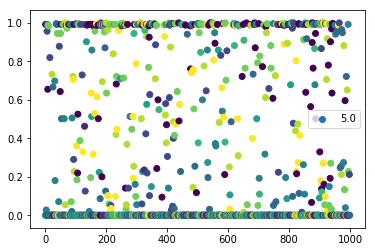

In [82]:
#i,x=enumerate(Xtrain[:,300])
label_map=['0','1','2','3','4','5','6','7','8','9']
plt.scatter(np.array(range(1000)),Xtrain[:,300],c=Ytrain)
plt.legend(Ytrain)